<a href="https://colab.research.google.com/github/irwinzebua/Skripsi/blob/main/SKRIPSI_IRWIN_BACKPROPRAGATION_DAGING_KERBAU_INDONESIA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***Import Library and Dataset***

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.neural_network import MLPRegressor
import matplotlib.pyplot as plt
from sklearn.exceptions import ConvergenceWarning
import warnings

data = pd.read_csv('/content/Data Real.xlsx - Sheet1.csv')

data.head(10)

,provinsi,tahun,Sapi,Kerbau,Kuda,Kambing,Domba,Babi
0,ACEH,2000,25055,8773,0,23139,3361,223
1,ACEH,2001,25902,9041,0,23438,3445,241
2,ACEH,2002,18002,8012,0,0,0,0
3,ACEH,2003,23456,9355,1,16174,1644,150
4,ACEH,2004,22172,9436,1,14543,2346,150
5,ACEH,2005,19693,8906,1,14131,1990,150
6,ACEH,2006,9931,8131,0,12104,1024,0
7,ACEH,2007,27698,9532,0,29308,4503,0
8,ACEH,2008,26239,8224,0,30161,3877,0
9,ACEH,2009,35601,11345,0,44569,4086,2529


# ***Retrieve the data that you want to predict input into the dataframe***

In [ ]:
#ubah dataframe sesuai column yang dibutuhkan
data  = pd.DataFrame(data[['provinsi','tahun','Kerbau']])
data.head(714)

,provinsi,tahun,Kerbau
0,ACEH,2000,8773
1,ACEH,2001,9041
2,ACEH,2002,8012
3,ACEH,2003,9355
4,ACEH,2004,9436
...,...,...,...
709,PAPUA,2016,154
710,PAPUA,2017,224
711,PAPUA,2018,104
712,PAPUA,2019,79


# ***Check the contents of the dataset***

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 714 entries, 0 to 713
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   provinsi  714 non-null    object
 1   tahun     714 non-null    int64 
 2   Kerbau    714 non-null    int64 
dtypes: int64(2), object(1)
memory usage: 16.9+ KB



# ***Plot by year and province of cattle slaughter***

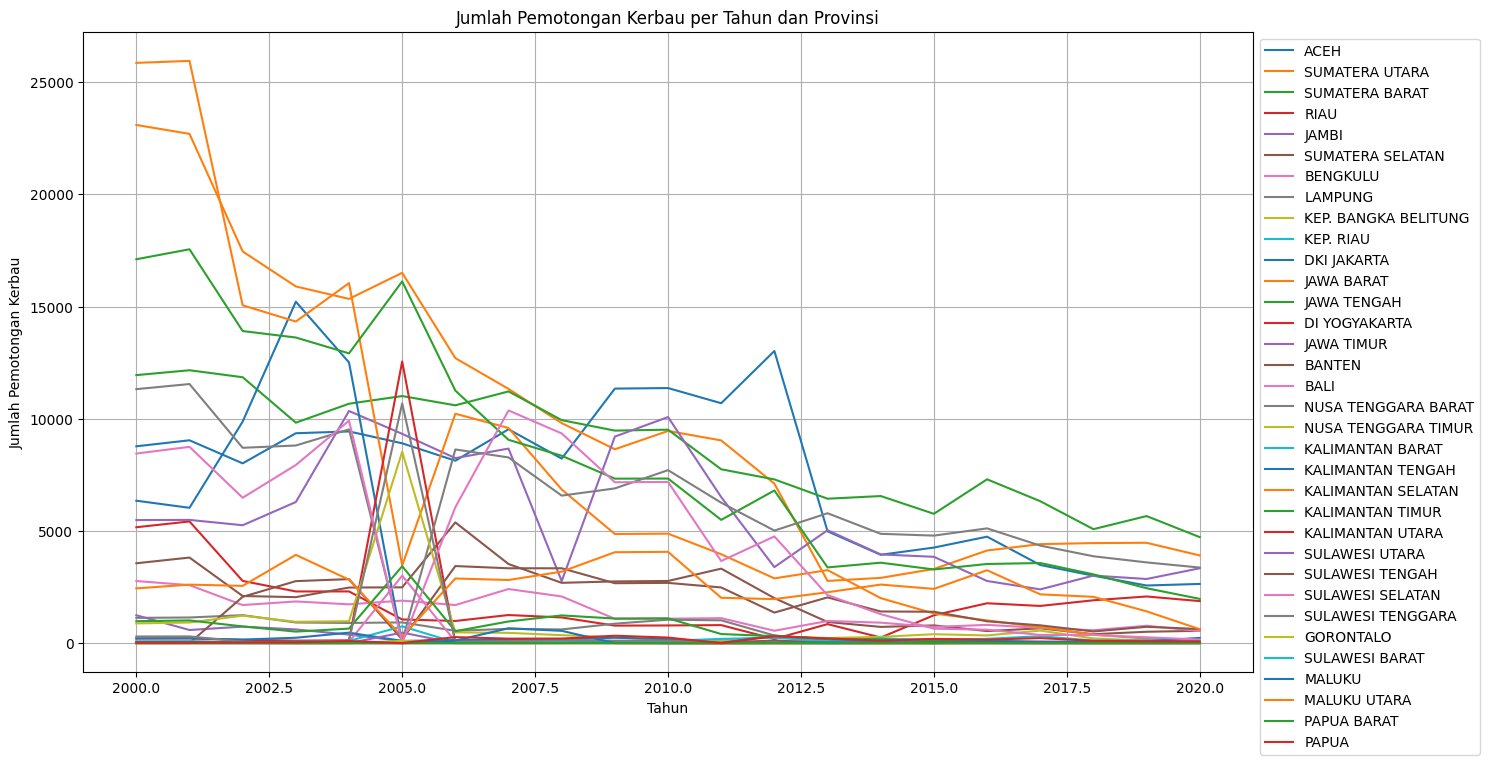

In [ ]:
import matplotlib.pyplot as plt
filtered_data = data[['provinsi', 'tahun', 'Kerbau']].copy()

plt.figure(figsize=(15, 8))

for provinsi in filtered_data['provinsi'].unique():
    provinsi_data = filtered_data[filtered_data['provinsi'] == provinsi]
    plt.plot(provinsi_data['tahun'], provinsi_data['Kerbau'], label=provinsi)

plt.title('Jumlah Pemotongan Kerbau per Tahun dan Provinsi')
plt.xlabel('Tahun')
plt.ylabel('Jumlah Pemotongan Kerbau')

plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.grid(True)

plt.tight_layout()
plt.show()

# ***Model regresi jaringan saraf tiruan dengan algoritma backpropagation Pendekatan Regresi Jaringan Saraf Tiruan (MLPRegressor) dan penskalaan fitur (MinMaxScaler)***

In [ ]:
prediksi_per_provinsi = {}

for provinsi in data['provinsi'].unique():
    data_provinsi = data[data['provinsi'] == provinsi]

    X = data_provinsi['tahun'].values.reshape(-1, 1)
    y = data_provinsi['Kerbau'].values

    scaler = MinMaxScaler()
    X = scaler.fit_transform(X)

    model = MLPRegressor(hidden_layer_sizes=(32, 64), activation='relu', solver='adam', tol=1e-5, max_iter=500, random_state=42)

    model.fit(X, y)

    X_2021 = scaler.transform([[2021]])
    pred_2021 = model.predict(X_2021)

    prediksi_per_provinsi[provinsi] = pred_2021

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptro

# ***Menampilkan Prediksi Jumlah Pemotongan Kerbau Tahun 2021 Tiap Provinsi***

In [ ]:
for provinsi, prediksi in prediksi_per_provinsi.items():
    print(f"Prediksi Jumlah Pemotongan Kerbau Tahun 2021 di {provinsi}: {prediksi}")

Prediksi Jumlah Pemotongan Kerbau Tahun 2021 di ACEH: [926.7081653]
Prediksi Jumlah Pemotongan Kerbau Tahun 2021 di SUMATERA UTARA: [926.81984074]
Prediksi Jumlah Pemotongan Kerbau Tahun 2021 di SUMATERA BARAT: [931.17379006]
Prediksi Jumlah Pemotongan Kerbau Tahun 2021 di RIAU: [827.20288776]
Prediksi Jumlah Pemotongan Kerbau Tahun 2021 di JAMBI: [918.34368205]
Prediksi Jumlah Pemotongan Kerbau Tahun 2021 di SUMATERA SELATAN: [843.73537267]
Prediksi Jumlah Pemotongan Kerbau Tahun 2021 di BENGKULU: [784.88640781]
Prediksi Jumlah Pemotongan Kerbau Tahun 2021 di LAMPUNG: [499.60728853]
Prediksi Jumlah Pemotongan Kerbau Tahun 2021 di KEP. BANGKA BELITUNG: [0.50833995]
Prediksi Jumlah Pemotongan Kerbau Tahun 2021 di KEP. RIAU: [-0.04719401]
Prediksi Jumlah Pemotongan Kerbau Tahun 2021 di DKI JAKARTA: [703.94472819]
Prediksi Jumlah Pemotongan Kerbau Tahun 2021 di JAWA BARAT: [907.33564718]
Prediksi Jumlah Pemotongan Kerbau Tahun 2021 di JAWA TENGAH: [921.62726134]
Prediksi Jumlah Pemotongan

# ***Hasil Prediksi Buat dalam dalam 1 columns***

In [ ]:
data['Prediksi 2021'] = pd.Series(prediksi_per_provinsi)

for provinsi, prediksi in prediksi_per_provinsi.items():
    prediksi_2021 = prediksi[0]
    data.loc[data['provinsi'] == provinsi, 'Prediksi 2021'] = prediksi_2021

data.head(500)

,provinsi,tahun,Kerbau,Prediksi 2021
0,ACEH,2000,8773,926.708165
1,ACEH,2001,9041,926.708165
2,ACEH,2002,8012,926.708165
3,ACEH,2003,9355,926.708165
4,ACEH,2004,9436,926.708165
...,...,...,...,...
495,KALIMANTAN UTARA,2012,0,-0.047194
496,KALIMANTAN UTARA,2013,0,-0.047194
497,KALIMANTAN UTARA,2014,0,-0.047194
498,KALIMANTAN UTARA,2015,0,-0.047194


# ***Membuat Plot Hasil Prediksi 2021 berdasarkan Provinsi***

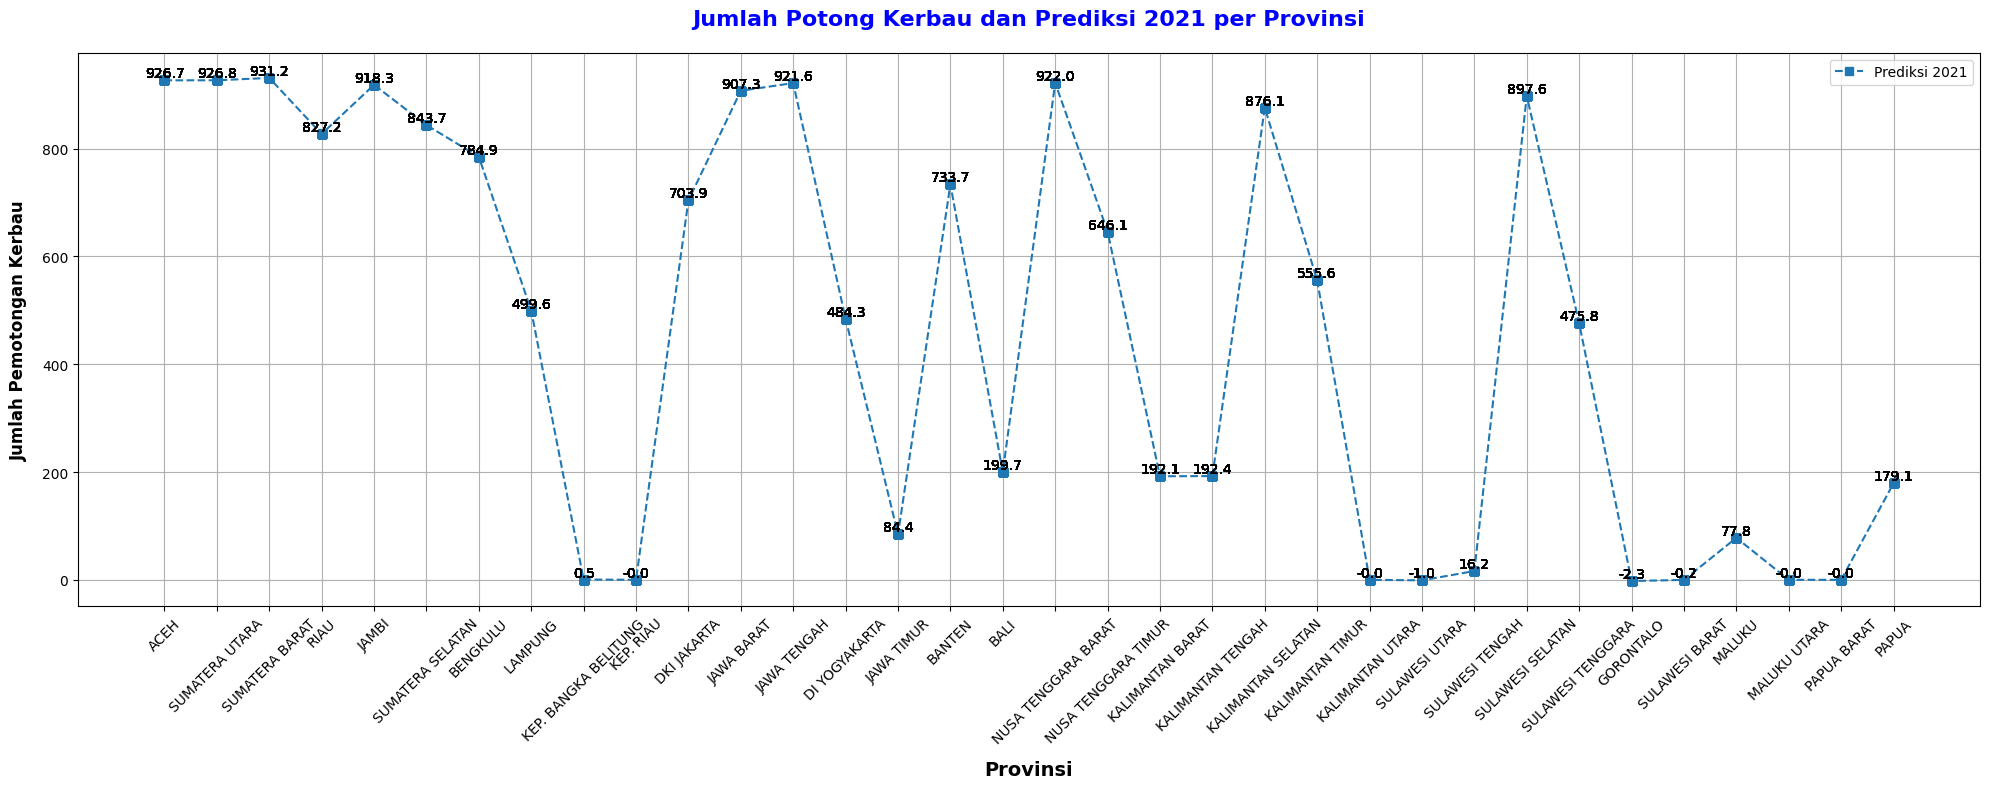

In [ ]:
#Grafik Kerbau
import matplotlib.pyplot as plt

filtered_data = data[['provinsi', 'tahun', 'Kerbau', 'Prediksi 2021']]
plt.figure(figsize=(20, 8))

plt.plot(filtered_data['provinsi'], filtered_data['Prediksi 2021'], label='Prediksi 2021', linestyle='--', marker='s')

for i in range(len(filtered_data)):
    plt.text(filtered_data['provinsi'].iloc[i], filtered_data['Prediksi 2021'].iloc[i],
             f'{filtered_data["Prediksi 2021"].iloc[i]:.1f}', ha='center', va='bottom')

plt.title('Jumlah Potong Kerbau dan Prediksi 2021 per Provinsi', fontweight='bold', fontsize=16, color='blue', pad=20)
plt.xlabel('Provinsi', fontweight='bold', fontsize=14, color='black', labelpad=10)
plt.ylabel('Jumlah Pemotongan Kerbau', fontweight='bold', fontsize=12, color='black', labelpad=10)

plt.legend()
plt.grid(True)

plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


# ***Donwload Data Prediksi***

In [ ]:
# Menyimpan data ke dalam file excel
data.to_excel('Data Prediksi Kerbau.xlsx', index=False)